In [76]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

In [ ]:
### Questions:


### Dataset

In [56]:
dataframe1= pd.read_excel("Data/nasa.xlsx")
dataframe2=pd.read_csv("Data/astronauts.csv")
dataframe3=pd.read_excel("Data/Female and Male Astronauts Accepted in the NASA Program.xlsx")

In [57]:
dataframe1.head()

,ID,DOB,Education,NASA,Military,Race,Gender,Interviewed,Selected,Status,rando,insamp,Announcement Date,Age
0,20090000,1984-11-22,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,0.176464,0,2009-06-29,24.599589
1,20090001,1984-07-16,6,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,0.760009,0,2009-06-29,24.952772
2,20090002,1984-02-09,4,No,No,Asian/Pacific Islander,Male,MBQ not interviewed,NaN,MBQ only,0.653344,0,2009-06-29,25.385352
3,20090003,1984-02-01,8,No,No,Asian/Pacific Islander,Male,MBQ not interviewed,NaN,MBQ only,0.510478,0,2009-06-29,25.407255
4,20090004,1984-01-20,4,No,No,Caucasian,Female,MBQ not interviewed,NaN,MBQ only,0.449820,0,2009-06-29,25.440110


In [58]:
dataframe2=pd.DataFrame(dataframe2)

In [59]:
dataframe2.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [60]:
dataframe3.head()

,ID,Cohort,Year,Males Accepted in NASA Program,Females Accepted in NASA Program
0,NaN,1,1959,100,0
1,NaN,2,1962,100,0
2,NaN,3,1963,100,0
3,NaN,4,1965,100,0
4,NaN,5,1966,100,0


In [61]:
dataframe1=pd.DataFrame(dataframe1)
dataframe3=pd.DataFrame(dataframe3)

## Remove extra columns to be able to combine into one data frame 

In [62]:
dataframe1=dataframe1.drop(columns=['ID','DOB','rando','Announcement Date','insamp'])

In [63]:
print(dataframe3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 0 non-null      float64
 1   Cohort                             27 non-null     int64  
 2   Year                               27 non-null     int64  
 3   Males Accepted in NASA Program     27 non-null     int64  
 4   Females Accepted in NASA Program   27 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 KB
None


In [64]:
dataframe2=dataframe2.drop(columns=['Group','Space Walks (hr)'])

In [65]:
NasaData=pd.merge(dataframe1,dataframe2, on='Gender')

In [66]:
NasaData.head()

,Education,NASA,Military,Race,Gender,Interviewed,Selected,Status_x,Age,Name,...,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Missions,Death Date,Death Mission
0,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,Joseph M. Acaba,...,Geology,Geology,NaN,NaN,2,3307,2,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,Loren W. Acton,...,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,STS 51-F (Challenger),NaN,NaN
2,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,James C. Adamson,...,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,Thomas D. Akers,...,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,4,No,No,Caucasian,Male,MBQ not interviewed,NaN,MBQ only,24.599589,Buzz Aldrin,...,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,"Gemini 12, Apollo 11",NaN,NaN


In [67]:
NasaData=NasaData.drop(columns=['Interviewed','Status_x','Death Mission','Death Date','Alma Mater','Birth Place','Selected', 'Status_y'])

In [68]:
NasaData.head()

,Education,NASA,Military,Race,Gender,Age,Name,Year,Status_y,Birth Date,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Missions
0,4,No,No,Caucasian,Male,24.599589,Joseph M. Acaba,2004.0,Active,5/17/1967,Geology,Geology,NaN,NaN,2,3307,2,"STS-119 (Discovery), ISS-31/32 (Soyuz)"
1,4,No,No,Caucasian,Male,24.599589,Loren W. Acton,NaN,Retired,3/7/1936,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,STS 51-F (Challenger)
2,4,No,No,Caucasian,Male,24.599589,James C. Adamson,1984.0,Retired,3/3/1946,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,"STS-28 (Columbia), STS-43 (Atlantis)"
3,4,No,No,Caucasian,Male,24.599589,Thomas D. Akers,1987.0,Retired,5/20/1951,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ..."
4,4,No,No,Caucasian,Male,24.599589,Buzz Aldrin,1963.0,Retired,1/20/1930,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,"Gemini 12, Apollo 11"


#### Does the space flight hours differ between males and females? (Independent t-test)

##### Test for Assumptions

<AxesSubplot:>

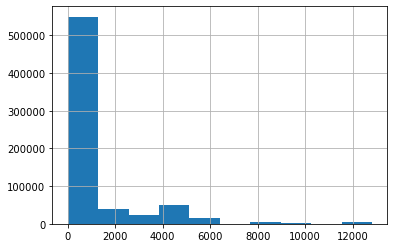

In [78]:
NasaData['Space Flight (hr)'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:xlabel='Space Flight (hr)', ylabel='Count'>

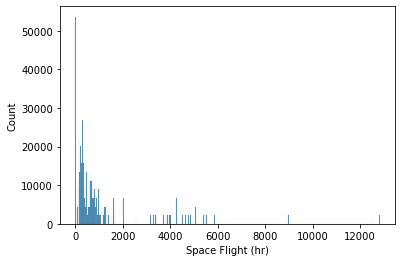

In [86]:
sns.histplot(NasaData['Space Flight (hr)'][NasaData['Gender']== 'Male'])

In [91]:
NasaData['Space Flight (hr)SQRT'] = np.sqrt(NasaData['Space Flight (hr)'])

<AxesSubplot:>

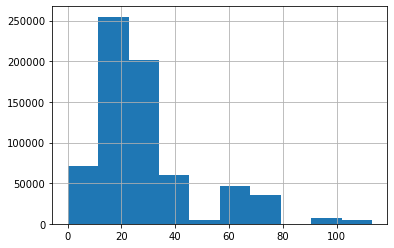

In [92]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Male'].hist()

<AxesSubplot:>

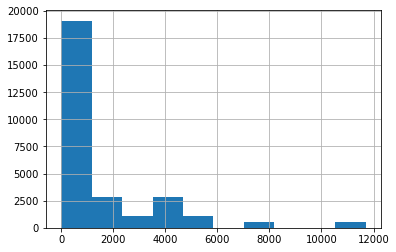

In [79]:
NasaData['Space Flight (hr)'][NasaData['Gender']== 'Female'].hist()

<AxesSubplot:>

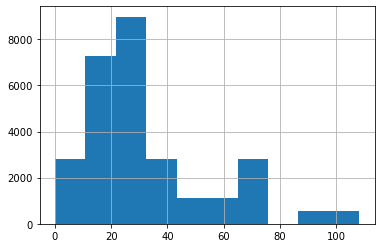

In [93]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Female'].hist()

##### Run Analysis

In [94]:
ttest_ind(NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Male'],NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Female'])

Ttest_indResult(statistic=-33.397001497696905, pvalue=2.3432743505986788e-244)

In [95]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Male'].mean()

28.121857019875563

In [96]:
NasaData['Space Flight (hr)SQRT'][NasaData['Gender']== 'Female'].mean()

32.24233522528614

#### There is a significance in the space flight time between males and females, females have more space flight time which is intresting

#### Does the space flight hours differ between hispanics and caucasians? (Independent t-test)

<AxesSubplot:>

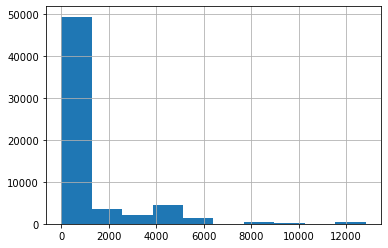

In [83]:
NasaData['Space Flight (hr)'][NasaData['Race']== 'Hispanic'].hist()

<AxesSubplot:>

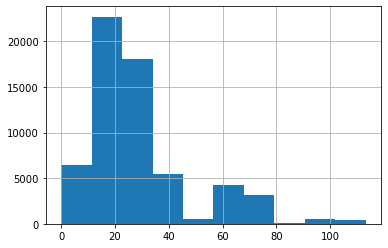

In [97]:
NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Hispanic'].hist()

<AxesSubplot:>

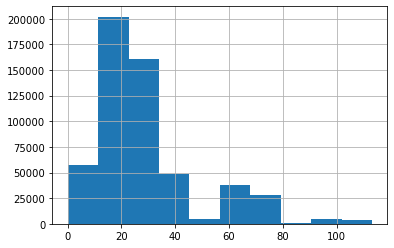

In [98]:
NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Caucasian'].hist()

In [99]:
ttest_ind(NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Hispanic'],NasaData['Space Flight (hr)SQRT'][NasaData['Race']== 'Caucasian'])

Ttest_indResult(statistic=0.00073729398427902, pvalue=0.9994117248072004)

#### no significant difference